In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline
from numpy import array

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import math
from sklearn.preprocessing import MinMaxScaler

In [6]:
def data_preprocessor(file_path):
    df = pd.read_excel(file_path, sheet_name='Data 1')
    df = df.loc[2:]
    df=df.rename(columns={'Back to Contents':'Date','Data 1: Europe Brent Spot Price FOB (Dollars per Barrel)':'Price'})
    df['Date']= pd.to_datetime(df['Date'])
    df['Price']= pd.to_numeric(df['Price'])
    df['Years']= df.Date.dt.strftime("%Y") # Year Extraction
    df['Months']= df.Date.dt.strftime("%B") # month extraction
    return df

In [7]:
#Convert date coulmns to specific format
#dateparse = lambda x: pd.datetime.strptime(x, "%b%d%y")
#Read csv file
dataset = data_preprocessor("RBRTEd.xls")


In [8]:
dataset

,Date,Price,Years,Months
2,1987-05-20,18.63,1987,May
3,1987-05-21,18.45,1987,May
4,1987-05-22,18.55,1987,May
5,1987-05-25,18.60,1987,May
6,1987-05-26,18.63,1987,May
...,...,...,...,...
9158,2023-06-20,75.79,2023,June
9159,2023-06-21,76.92,2023,June
9160,2023-06-22,73.93,2023,June
9161,2023-06-23,73.56,2023,June


In [9]:
dataset['Date'] = pd.to_datetime(dataset['Date'],infer_datetime_format=True) 
df = dataset.set_index(['Date'])

# printing
df.head(5)

,Price,Years,Months
Date,,,
1987-05-20,18.63,1987,May
1987-05-21,18.45,1987,May
1987-05-22,18.55,1987,May
1987-05-25,18.60,1987,May
1987-05-26,18.63,1987,May


In [10]:
def DfInfo(df_initial):
    # gives some infos on columns types and numer of null values
    tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: 'column type'})
    tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0: 'null values (nb)'}))
    tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum() / df_initial.shape[0] * 100).T.rename(index={0: 'null values (%)'}))
    return tab_info

In [11]:
DfInfo(df)

C:\Users\91775\AppData\Local\Temp\ipykernel_13980\3880555729.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0: 'null values (nb)'}))
C:\Users\91775\AppData\Local\Temp\ipykernel_13980\3880555729.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum() / df_initial.shape[0] * 100).T.rename(index={0: 'null values (%)'}))


,Price,Years,Months
column type,float64,object,object
null values (nb),0,0,0
null values (%),0.0,0.0,0.0


In [12]:
df.index

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02',
               ...
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-26'],
              dtype='datetime64[ns]', name='Date', length=9161, freq=None)

In [13]:
y = df['Price'].resample('MS').mean()

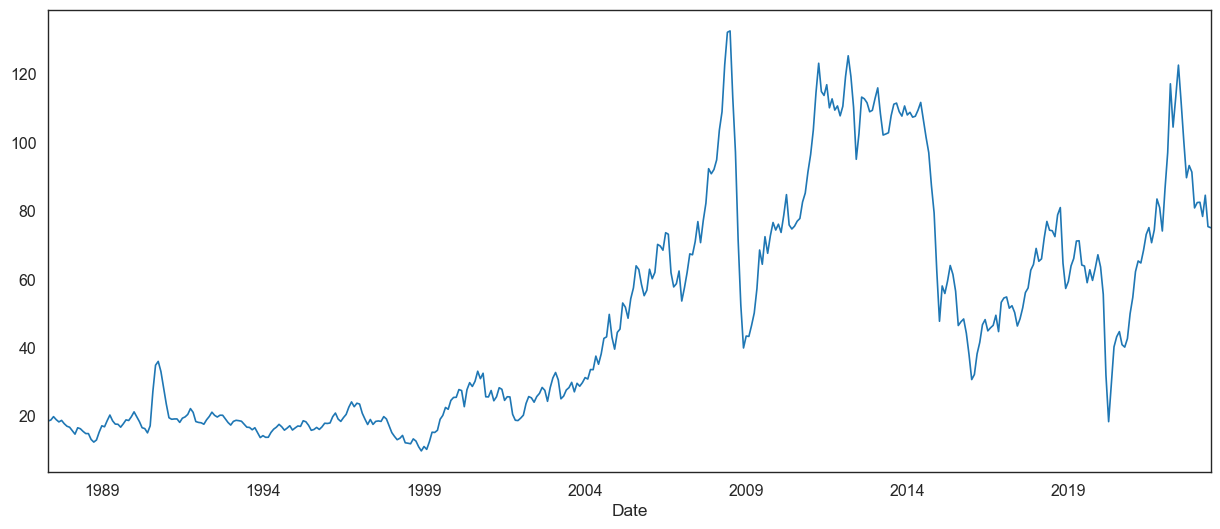

In [14]:
y.plot(figsize=(15, 6))
plt.show()

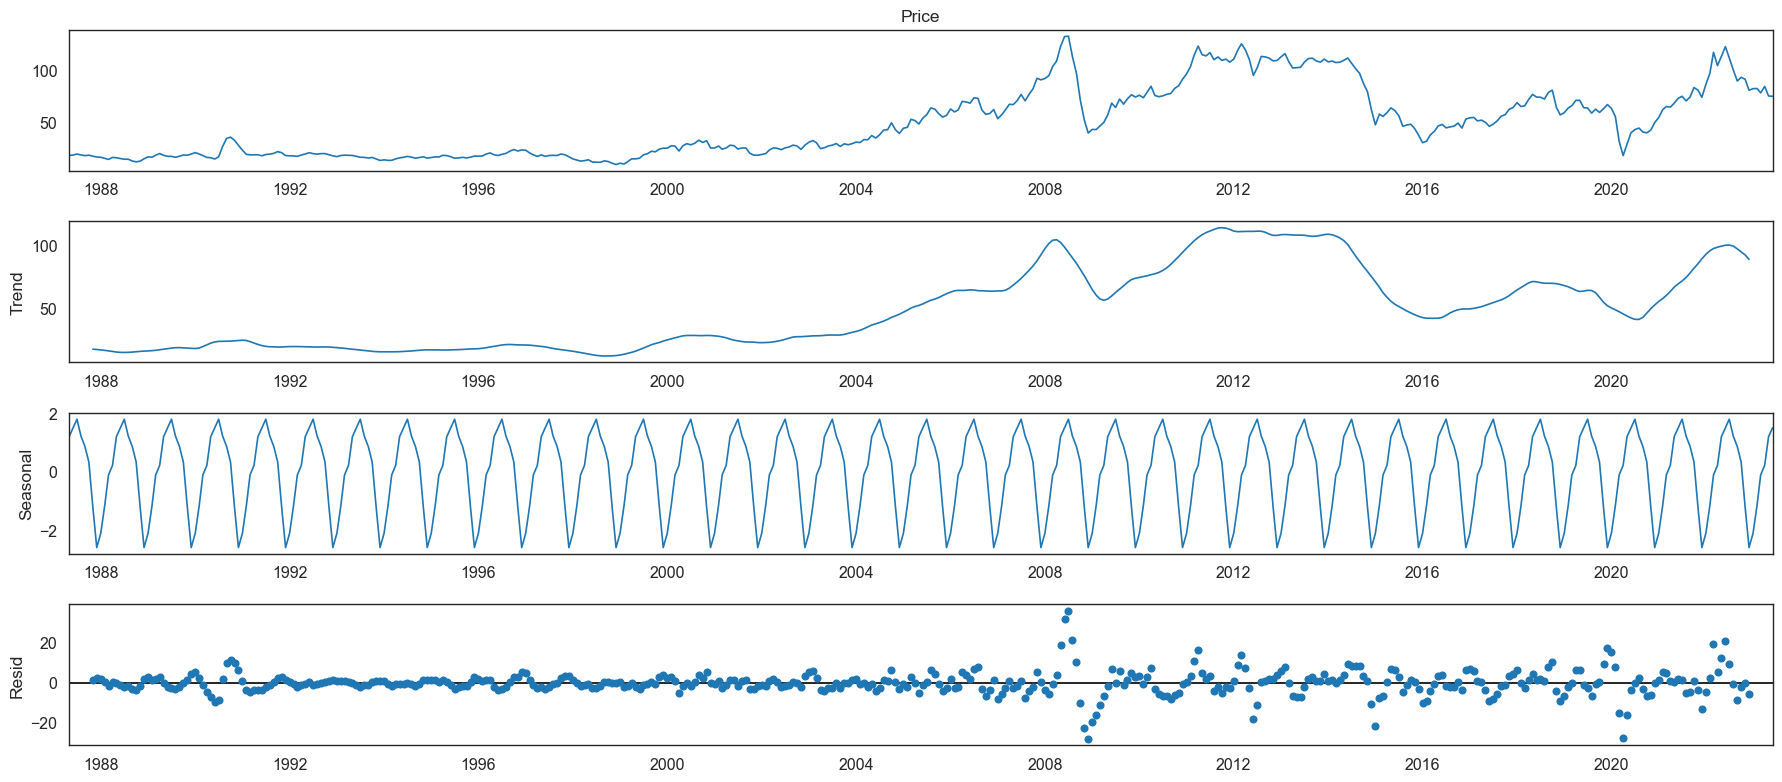

In [15]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [18]:
# normalize the data_set 
sc = MinMaxScaler(feature_range = (0, 1))
df = sc.fit_transform(df[['Price']])

In [19]:
# split into train and test sets
train_size = int(len(df) * 0.90)
test_size = len(df) - train_size
train, test = df[0:train_size, :], df[train_size:len(df), :]

In [20]:
train

array([[0.07067112],
       [0.0693363 ],
       [0.07007786],
       ...,
       [0.39762699],
       [0.39310345],
       [0.39673712]])

In [21]:
train.shape

(8244, 1)

In [22]:
test

array([[3.92287727e-01],
       [3.96588802e-01],
       [3.93696700e-01],
       [3.94289952e-01],
       [3.95698925e-01],
       [4.02076381e-01],
       [3.98368558e-01],
       [3.95031516e-01],
       [4.05635892e-01],
       [4.14460512e-01],
       [4.13274008e-01],
       [4.12087505e-01],
       [4.13199852e-01],
       [4.14757138e-01],
       [4.12161661e-01],
       [4.10826845e-01],
       [4.01186504e-01],
       [3.99332592e-01],
       [4.16388580e-01],
       [4.19503152e-01],
       [4.25658139e-01],
       [4.25213200e-01],
       [4.26177234e-01],
       [4.17278458e-01],
       [4.26918799e-01],
       [4.32628847e-01],
       [4.37078235e-01],
       [4.44123100e-01],
       [4.45087134e-01],
       [4.49388209e-01],
       [4.41675936e-01],
       [4.32999629e-01],
       [4.46125324e-01],
       [4.46125324e-01],
       [4.43529848e-01],
       [4.39006303e-01],
       [4.35076010e-01],
       [4.29736745e-01],
       [4.44790508e-01],
       [4.53466815e-01],


In [23]:
test.shape

(917, 1)

In [24]:
# convert an array of values into a data_set matrix def
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [25]:
# reshape into X=t and Y=t+1
look_back =90
X_train,Y_train,X_test,Ytest = [],[],[],[]
X_train,Y_train=create_data_set(train,look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test,Y_test=create_data_set(test,look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
# create and fit the LSTM network regressor = Sequential() 
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 20, batch_size = 15,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)

Epoch 1/20
544/544 [==============================] - 49s 80ms/step - loss: 0.0038 - val_loss: 0.0427 - lr: 0.0010
Epoch 2/20
544/544 [==============================] - 43s 79ms/step - loss: 0.0076 - val_loss: 0.0348 - lr: 0.0010
Epoch 3/20
544/544 [==============================] - 44s 81ms/step - loss: 0.0105 - val_loss: 0.0363 - lr: 0.0010
Epoch 4/20
544/544 [==============================] - 45s 82ms/step - loss: 0.0110 - val_loss: 0.0367 - lr: 0.0010
Epoch 5/20
544/544 [==============================] - 51s 94ms/step - loss: 0.0200 - val_loss: 0.0427 - lr: 0.0010
Epoch 6/20
544/544 [==============================] - 47s 87ms/step - loss: 0.0219 - val_loss: 0.0450 - lr: 0.0010
Epoch 7/20
544/544 [==============================] - 51s 94ms/step - loss: 0.0219 - val_loss: 0.0442 - lr: 0.0010
Epoch 8/20
544/544 [==============================] - 49s 89ms/step - loss: 0.0635 - val_loss: 0.0531 - lr: 1.0000e-04
Epoch 9/20
544/544 [==============================] - 49s 90ms/step - loss: 

In [27]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

26/26 [==============================] - 1s 36ms/step


In [28]:
# invert predictions
train_predict = sc.inverse_transform(train_predict)
Y_train = sc.inverse_transform([Y_train])
test_predict = sc.inverse_transform(test_predict)
Y_test = sc.inverse_transform([Y_test])

In [31]:
train_predict

array([[50.725582],
       [50.725693],
       [50.725792],
       ...,
       [50.898117],
       [50.898636],
       [50.899567]], dtype=float32)

In [32]:
Y_train

array([[18.68, 18.6 , 18.65, ..., 62.52, 62.72, 62.11]])

In [33]:
test_predict

array([[50.83502 ],
       [50.828587],
       [50.82103 ],
       [50.81408 ],
       [50.807686],
       [50.80209 ],
       [50.796806],
       [50.792057],
       [50.78764 ],
       [50.78311 ],
       [50.777943],
       [50.772034],
       [50.765965],
       [50.761417],
       [50.759014],
       [50.75726 ],
       [50.75534 ],
       [50.75393 ],
       [50.752174],
       [50.750687],
       [50.74846 ],
       [50.746635],
       [50.744705],
       [50.742664],
       [50.738953],
       [50.73529 ],
       [50.732178],
       [50.730618],
       [50.728664],
       [50.726963],
       [50.72584 ],
       [50.725243],
       [50.725   ],
       [50.72512 ],
       [50.72666 ],
       [50.72858 ],
       [50.73061 ],
       [50.732376],
       [50.7347  ],
       [50.737385],
       [50.740486],
       [50.743904],
       [50.747837],
       [50.751675],
       [50.755768],
       [50.75957 ],
       [50.76309 ],
       [50.76612 ],
       [50.768593],
       [50.77108 ],


Train Mean Absolute Error: 28.519714412270446
Train Root Mean Squared Error: 32.84742683366578
Test Mean Absolute Error: 28.544036396756297
Test Root Mean Squared Error: 33.7379702402679


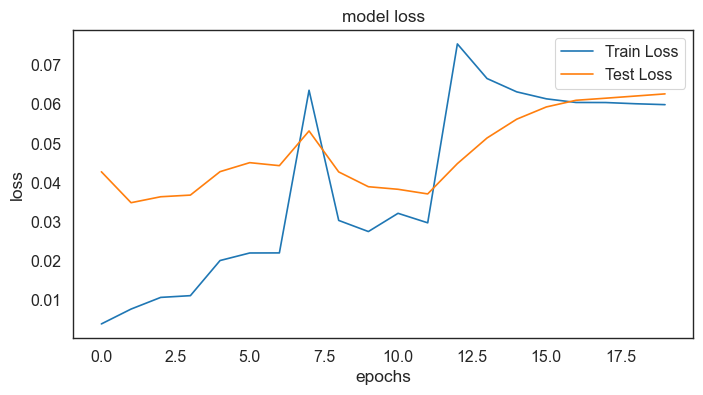

In [29]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

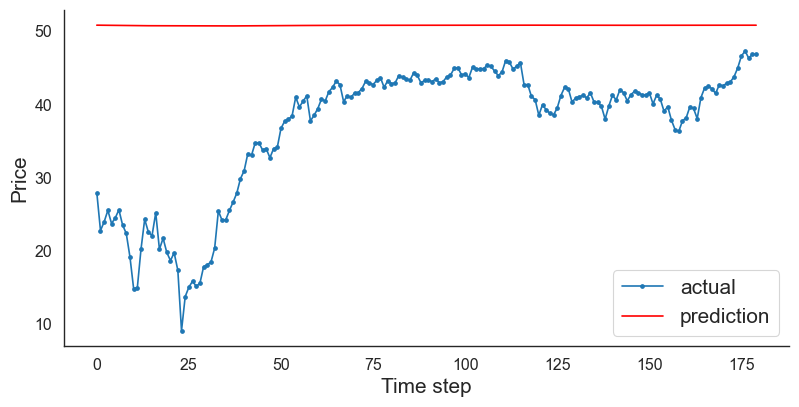

In [30]:
#Compare Actual vs. Prediction
aa=[x for x in range(180)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:180], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:180], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();